In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.ensemble import IsolationForest


# dff from past year <br>
sources: <br>
https://fred.stlouisfed.org/series/DFF

In [2]:
dff = pd.read_csv('DFF.csv',header='infer')
dff.head()

,DATE,DFF
0,2010-04-16,0.21
1,2010-04-17,0.21
2,2010-04-18,0.21
3,2010-04-19,0.20
4,2010-04-20,0.20


Text(0.5, 1.0, 'DFF 10 Years')

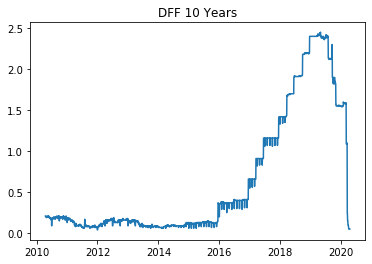

In [3]:
dff_date = pd.to_datetime(np.array(dff["DATE"]))
dff_plot = dff["DFF"]
dff_plot.index = dff_date
plt.plot(dff_plot)
plt.title("DFF 10 Years")

# s&p data since 2010<br>
sources: <br>
https://finance.yahoo.com/quote/%5EGSPC/history/

In [4]:
sp = pd.read_csv('s&p.csv',header='infer')
sp.head()
# sp.shape

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [5]:
sp["trend"] = ((sp['Open']-sp["Close"])/sp["Open"])*100
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,trend
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,-1.471478
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,-0.340789
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,-0.125917
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,-0.476992
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,-0.391046


In [6]:
sp["Date"] = pd.to_datetime(np.array(sp["Date"]))
sp = sp.loc[sp["Date"] >= "2015"]
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,trend
1258,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,0.033996
1259,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,1.648137
1260,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,0.966300
1261,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,-1.014683
1262,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,-1.552731


Text(0.5, 1.0, 'S&P Open 10 Years')

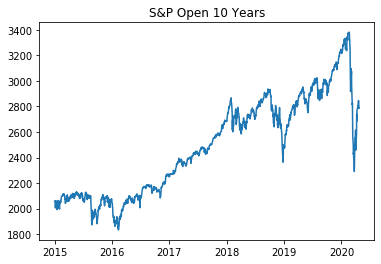

In [7]:
sp_date = pd.to_datetime(np.array(sp["Date"]))
sp_plot = sp[["Open","High", "Low", "Close", "Adj Close", "Volume","trend"]]
sp_plot.index = sp_date
plt.plot(sp_plot["Open"])
plt.title("S&P Open 10 Years")

Text(0.5, 1.0, 'SP Volume')

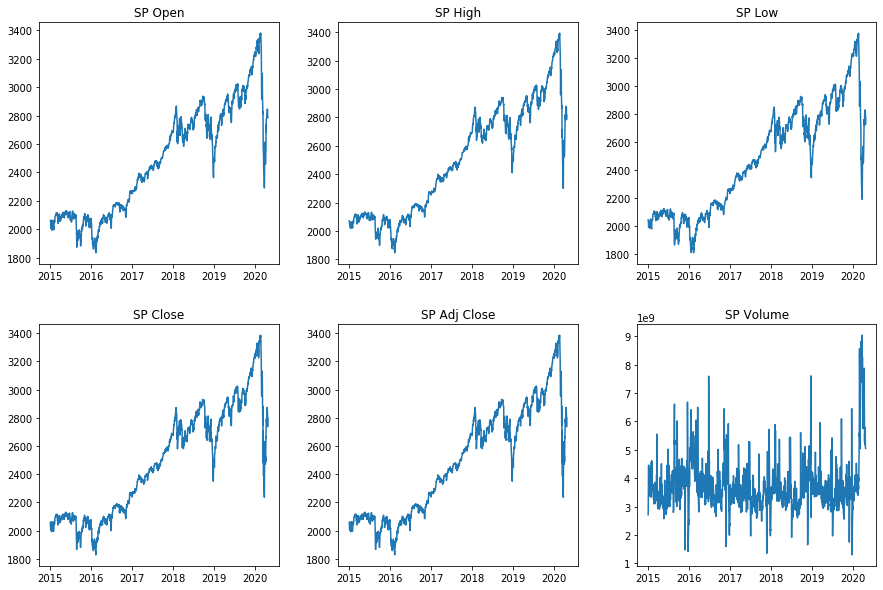

In [8]:
fig, axs = plt.subplots(2, 3,figsize=(15,10))
fig.subplots_adjust(wspace=0.25)
fig.subplots_adjust(hspace=0.25)

axs[0,0].plot(sp_plot["Open"])
axs[0,0].set_title("SP Open")
axs[0,1].plot(sp_plot["High"])
axs[0,1].set_title("SP High")
axs[0,2].plot(sp_plot["Low"])
axs[0,2].set_title("SP Low")
axs[1,0].plot(sp_plot["Close"])
axs[1,0].set_title("SP Close")
axs[1,1].plot(sp_plot["Adj Close"])
axs[1,1].set_title("SP Adj Close")
axs[1,2].plot(sp_plot["Volume"])
axs[1,2].set_title("SP Volume")


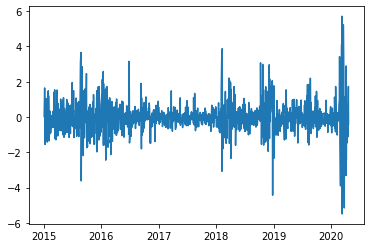

In [9]:
plt.plot(sp_plot["trend"])

# treasury yeild data <br>
sources: <br>
https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2020

In [10]:
yeild_10 = pd.read_csv('yeild_2010.csv',header='infer')
yeild_10["Date"] = pd.to_datetime(yeild_10["Date"])
yeild_10["difference"] = yeild_10["10 Yr"] - yeild_10["1 Yr"]

# yeild_10.shape
yeild_10.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2010-01-04,0.05,NaN,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65,3.40
1,2010-01-05,0.03,NaN,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59,3.36
2,2010-01-06,0.03,NaN,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70,3.45
3,2010-01-07,0.02,NaN,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69,3.45
4,2010-01-08,0.02,NaN,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70,3.46


In [11]:
yeild_11 = pd.read_csv('yeild_2011.csv',header='infer')
yeild_11["Date"] = pd.to_datetime(yeild_11["Date"])
yeild_11["difference"] = yeild_11["10 Yr"] - yeild_11["1 Yr"]

yeild_11.head()
# yeild_11.shape

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2011-01-03,0.11,NaN,0.15,0.19,0.29,0.61,1.03,2.02,2.74,3.36,4.18,4.39,3.07
1,2011-01-04,0.12,NaN,0.14,0.19,0.28,0.63,1.04,2.01,2.72,3.36,4.21,4.44,3.08
2,2011-01-05,0.13,NaN,0.14,0.19,0.31,0.71,1.16,2.14,2.86,3.50,4.34,4.55,3.19
3,2011-01-06,0.13,NaN,0.15,0.18,0.30,0.68,1.11,2.09,2.80,3.44,4.31,4.53,3.14
4,2011-01-07,0.13,NaN,0.14,0.18,0.29,0.60,1.02,1.96,2.69,3.34,4.25,4.48,3.05


In [12]:
yeild_12 = pd.read_csv('yeild_2012.csv',header='infer')
yeild_12["Date"] = pd.to_datetime(yeild_12["Date"])
yeild_12["difference"] = yeild_12["10 Yr"] - yeild_12["1 Yr"]

yeild_12.head()
# yeild_12.shape

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2012-01-03,0.01,NaN,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98,1.85
1,2012-01-04,0.01,NaN,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03,1.88
2,2012-01-05,0.01,NaN,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06,1.91
3,2012-01-06,0.02,NaN,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02,1.86
4,2012-01-09,0.01,NaN,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02,1.87


In [13]:
yeild_13 = pd.read_csv('yeild_2013.csv',header='infer')
yeild_13["Date"] = pd.to_datetime(yeild_13["Date"])
yeild_13["difference"] = yeild_13["10 Yr"] - yeild_13["1 Yr"]

yeild_13.head()
# yeild_13.shape

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2013-01-02,0.07,NaN,0.08,0.12,0.15,0.27,0.37,0.76,1.25,1.86,2.63,3.04,1.71
1,2013-01-03,0.06,NaN,0.08,0.12,0.15,0.27,0.40,0.81,1.31,1.92,2.70,3.12,1.77
2,2013-01-04,0.06,NaN,0.07,0.11,0.15,0.27,0.41,0.82,1.32,1.93,2.70,3.10,1.78
3,2013-01-07,0.05,NaN,0.07,0.11,0.15,0.27,0.41,0.82,1.31,1.92,2.70,3.10,1.77
4,2013-01-08,0.06,NaN,0.07,0.11,0.14,0.25,0.38,0.79,1.28,1.89,2.66,3.06,1.75


In [14]:
yeild_14 = pd.read_csv('yeild_2014.csv',header='infer')
yeild_14["Date"] = pd.to_datetime(yeild_14["Date"])
yeild_14["difference"] = yeild_14["10 Yr"] - yeild_14["1 Yr"]

yeild_14.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2014-01-02,0.01,NaN,0.07,0.09,0.13,0.39,0.76,1.72,2.41,3.00,3.68,3.92,2.87
1,2014-01-03,0.02,NaN,0.07,0.10,0.13,0.41,0.80,1.73,2.42,3.01,3.69,3.93,2.88
2,2014-01-06,0.01,NaN,0.05,0.08,0.12,0.40,0.78,1.70,2.38,2.98,3.66,3.90,2.86
3,2014-01-07,0.01,NaN,0.04,0.08,0.13,0.40,0.80,1.69,2.37,2.96,3.64,3.88,2.83
4,2014-01-08,0.00,NaN,0.05,0.08,0.13,0.43,0.87,1.77,2.44,3.01,3.67,3.90,2.88


In [15]:
yeild_15 = pd.read_csv('yeild_2015.csv',header='infer')
yeild_15["Date"] = pd.to_datetime(yeild_15["Date"])
yeild_15["difference"] = yeild_15["10 Yr"] - yeild_15["1 Yr"]
yeild_15.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2015-01-02,0.02,NaN,0.02,0.11,0.25,0.66,1.07,1.61,1.92,2.12,2.41,2.69,1.87
1,2015-01-05,0.02,NaN,0.03,0.10,0.26,0.68,1.06,1.57,1.85,2.04,2.32,2.60,1.78
2,2015-01-06,0.02,NaN,0.03,0.10,0.25,0.65,1.02,1.50,1.78,1.97,2.25,2.52,1.72
3,2015-01-07,0.02,NaN,0.03,0.09,0.25,0.62,1.00,1.47,1.76,1.96,2.25,2.52,1.71
4,2015-01-08,0.01,NaN,0.03,0.08,0.23,0.62,1.00,1.50,1.81,2.03,2.33,2.59,1.80


In [16]:
yeild_16 = pd.read_csv('yeild_2016.csv',header='infer')
yeild_16["Date"] = pd.to_datetime(yeild_16["Date"])
yeild_16["difference"] = yeild_16["10 Yr"] - yeild_16["1 Yr"]

yeild_16.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2016-01-04,0.17,NaN,0.22,0.49,0.61,1.02,1.31,1.73,2.06,2.24,2.64,2.98,1.63
1,2016-01-05,0.20,NaN,0.20,0.49,0.68,1.04,1.32,1.73,2.06,2.25,2.67,3.01,1.57
2,2016-01-06,0.21,NaN,0.21,0.47,0.67,0.99,1.26,1.65,1.98,2.18,2.59,2.94,1.51
3,2016-01-07,0.20,NaN,0.20,0.46,0.66,0.96,1.22,1.61,1.94,2.16,2.56,2.92,1.50
4,2016-01-08,0.20,NaN,0.20,0.45,0.64,0.94,1.20,1.57,1.91,2.13,2.55,2.91,1.49


In [17]:
yeild_17 = pd.read_csv('yeild_2017.csv',header='infer')
yeild_17["Date"] = pd.to_datetime(yeild_17["Date"])
yeild_17["difference"] = yeild_17["10 Yr"] - yeild_17["1 Yr"]
yeild_17.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2017-01-03,0.52,NaN,0.53,0.65,0.89,1.22,1.50,1.94,2.26,2.45,2.78,3.04,1.56
1,2017-01-04,0.49,NaN,0.53,0.63,0.87,1.24,1.50,1.94,2.26,2.46,2.78,3.05,1.59
2,2017-01-05,0.51,NaN,0.52,0.62,0.83,1.17,1.43,1.86,2.18,2.37,2.69,2.96,1.54
3,2017-01-06,0.50,NaN,0.53,0.61,0.85,1.22,1.50,1.92,2.23,2.42,2.73,3.00,1.57
4,2017-01-09,0.50,NaN,0.50,0.60,0.82,1.21,1.47,1.89,2.18,2.38,2.69,2.97,1.56


In [18]:
yeild_18 = pd.read_csv('yeild_2018.csv',header='infer')
yeild_18["Date"] = pd.to_datetime(yeild_18["Date"])
yeild_18["difference"] = yeild_18["10 Yr"] - yeild_18["1 Yr"]
yeild_18.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2018-01-02,1.29,NaN,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81,0.63
1,2018-01-03,1.29,NaN,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78,0.63
2,2018-01-04,1.28,NaN,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79,0.64
3,2018-01-05,1.27,NaN,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81,0.67
4,2018-01-08,1.30,NaN,1.45,1.60,1.79,1.96,2.07,2.29,2.41,2.49,2.65,2.81,0.70


In [19]:
yeild_19 = pd.read_csv('yeild_2019.csv',header='infer')
yeild_19["Date"] = pd.to_datetime(yeild_19["Date"])
yeild_19["difference"] = yeild_19["10 Yr"] - yeild_19["1 Yr"]
yeild_19.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2019-01-02,2.40,2.40,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97,0.06
1,2019-01-03,2.42,2.42,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92,0.06
2,2019-01-04,2.40,2.42,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98,0.10
3,2019-01-07,2.42,2.42,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99,0.12
4,2019-01-08,2.40,2.42,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00,0.13


In [20]:
yeild_20 = pd.read_csv('yeild_2020.csv',header='infer')
yeild_20["Date"] = pd.to_datetime(yeild_20["Date"])
yeild_20["difference"] = yeild_20["10 Yr"] - yeild_20["1 Yr"]
yeild_20.head()


,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33,0.32
1,2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26,0.25
2,2020-01-06,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28,0.27
3,2020-01-07,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31,0.30
4,2020-01-08,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35,0.32


In [21]:
yeilds = [yeild_10,yeild_11,yeild_12,yeild_13,yeild_14,yeild_15,yeild_16,yeild_17,yeild_18,yeild_19,yeild_20]
yeilds_concat = pd.concat(yeilds)
yeilds_concat = yeilds_concat.loc[yeilds_concat["Date"] >= "2015"]
yeilds_concat.head()


,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference
0,2015-01-02,0.02,NaN,0.02,0.11,0.25,0.66,1.07,1.61,1.92,2.12,2.41,2.69,1.87
1,2015-01-05,0.02,NaN,0.03,0.10,0.26,0.68,1.06,1.57,1.85,2.04,2.32,2.60,1.78
2,2015-01-06,0.02,NaN,0.03,0.10,0.25,0.65,1.02,1.50,1.78,1.97,2.25,2.52,1.72
3,2015-01-07,0.02,NaN,0.03,0.09,0.25,0.62,1.00,1.47,1.76,1.96,2.25,2.52,1.71
4,2015-01-08,0.01,NaN,0.03,0.08,0.23,0.62,1.00,1.50,1.81,2.03,2.33,2.59,1.80


,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,difference
1 Mo,1.000000,0.996274,0.987273,0.965164,0.911040,0.846889,0.698323,0.571807,0.480412,-0.879170
3 Mo,0.996274,1.000000,0.995927,0.980176,0.933759,0.874957,0.734390,0.611963,0.521440,-0.866088
6 Mo,0.987273,0.995927,1.000000,0.992670,0.957303,0.905855,0.776071,0.659887,0.571563,-0.842461
1 Yr,0.965164,0.980176,0.992670,1.000000,0.982993,0.944753,0.834426,0.729240,0.645445,-0.793134
2 Yr,0.911040,0.933759,0.957303,0.982993,1.000000,0.987623,0.915242,0.832108,0.758990,-0.680354
3 Yr,0.846889,0.874957,0.905855,0.944753,0.987623,1.000000,0.965938,0.905969,0.846117,-0.560870
5 Yr,0.698323,0.734390,0.776071,0.834426,0.915242,0.965938,1.000000,0.983862,0.952247,-0.331957
7 Yr,0.571807,0.611963,0.659887,0.729240,0.832108,0.905969,0.983862,1.000000,0.990683,-0.163746
10 Yr,0.480412,0.521440,0.571563,0.645445,0.758990,0.846117,0.952247,0.990683,1.000000,-0.046730
difference,-0.879170,-0.866088,-0.842461,-0.793134,-0.680354,-0.560870,-0.331957,-0.163746,-0.046730,1.000000


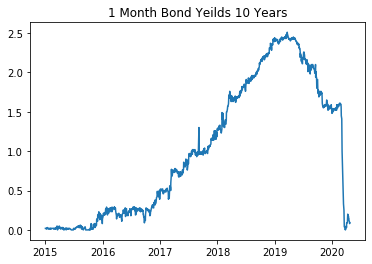

In [22]:
yeild_date = pd.to_datetime(np.array(yeilds_concat["Date"]))
yeild_plot = yeilds_concat[["1 Mo", "3 Mo", "6 Mo", "1 Yr", "2 Yr","3 Yr", "5 Yr", "7 Yr","10 Yr","difference"]]
yeild_plot.index = yeild_date

plt.plot(yeild_plot["1 Mo"])
plt.title("1 Month Bond Yeilds 10 Years")
yeild_plot.corr()

Text(0.5, 1.0, '10 Yr Bond Yeilds 10 Years')

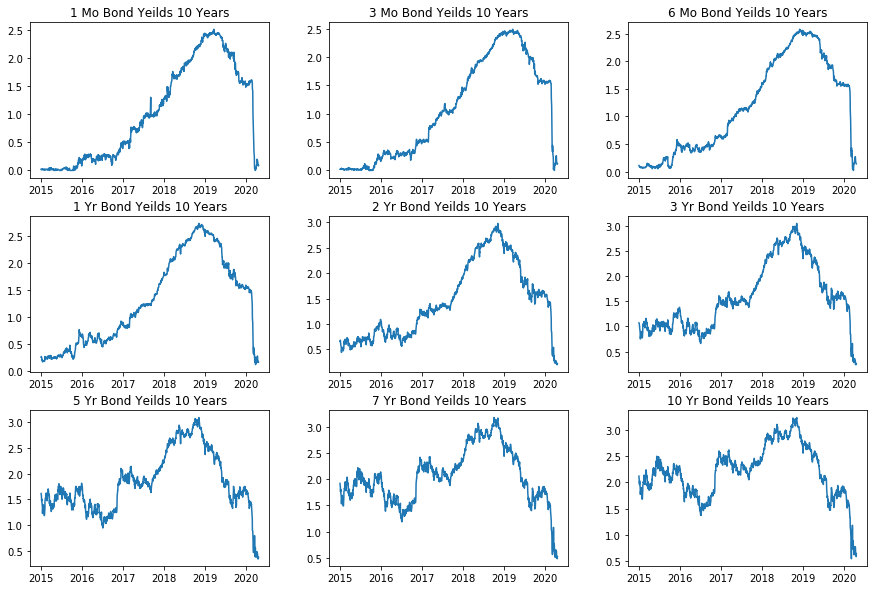

In [23]:
fig, axs = plt.subplots(3, 3,figsize=(15,10))
fig.subplots_adjust(wspace=0.25)
fig.subplots_adjust(hspace=0.25)

axs[0,0].plot(yeild_plot["1 Mo"])
axs[0,0].set_title("1 Mo Bond Yeilds 10 Years")
axs[0,1].plot(yeild_plot["3 Mo"])
axs[0,1].set_title("3 Mo Bond Yeilds 10 Years")
axs[0,2].plot(yeild_plot["6 Mo"])
axs[0,2].set_title("6 Mo Bond Yeilds 10 Years")
axs[1,0].plot(yeild_plot["1 Yr"])
axs[1,0].set_title("1 Yr Bond Yeilds 10 Years")
axs[1,1].plot(yeild_plot["2 Yr"])
axs[1,1].set_title("2 Yr Bond Yeilds 10 Years")
axs[1,2].plot(yeild_plot["3 Yr"])
axs[1,2].set_title("3 Yr Bond Yeilds 10 Years")
axs[2,0].plot(yeild_plot["5 Yr"])
axs[2,0].set_title("5 Yr Bond Yeilds 10 Years")
axs[2,1].plot(yeild_plot["7 Yr"])
axs[2,1].set_title("7 Yr Bond Yeilds 10 Years")
axs[2,2].plot(yeild_plot["10 Yr"])
axs[2,2].set_title("10 Yr Bond Yeilds 10 Years")

Text(0.5, 1.0, 'Difference between 10 years and 1 year over time')

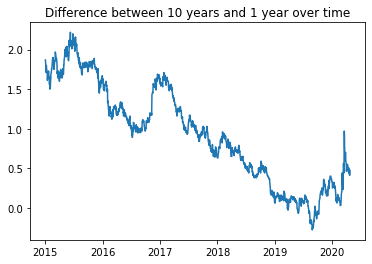

In [24]:
plt.plot(yeild_plot["difference"],)
plt.title("Difference between 10 years and 1 year over time")

# real gdp data from past 10 years <br>
sources: <br>
https://fred.stlouisfed.org/series/GDPC1

In [25]:
real_gdp = pd.read_csv('read_gdp.csv',header='infer')
real_gdp.head()

,DATE,GDPC1
0,2009-10-01,15356.058
1,2010-01-01,15415.145
2,2010-04-01,15557.277
3,2010-07-01,15671.967
4,2010-10-01,15750.625


Text(0.5, 1.0, 'Real GDP 10 Years')

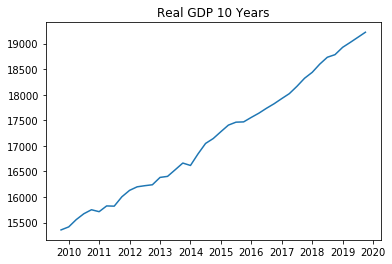

In [26]:
gdp_date = pd.to_datetime(np.array(real_gdp["DATE"]))

real_gdp_plot = real_gdp["GDPC1"]
real_gdp_plot.index = gdp_date

plt.plot(real_gdp_plot)
plt.title("Real GDP 10 Years")

# VIX data <br>
sources: <br>
https://finance.yahoo.com/quote/%5EVIX/

In [27]:
vix = pd.read_csv("^VIX.csv", header='infer')
vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-20,16.840000,16.889999,15.730000,15.730000,15.730000,0
1,2010-04-21,15.940000,16.850000,15.500000,16.320000,16.320000,0
2,2010-04-22,17.480000,18.190001,16.200001,16.469999,16.469999,0
3,2010-04-23,16.620001,16.709999,16.120001,16.620001,16.620001,0
4,2010-04-26,17.520000,17.530001,17.070000,17.469999,17.469999,0


Text(0.5, 1.0, 'VIX all')

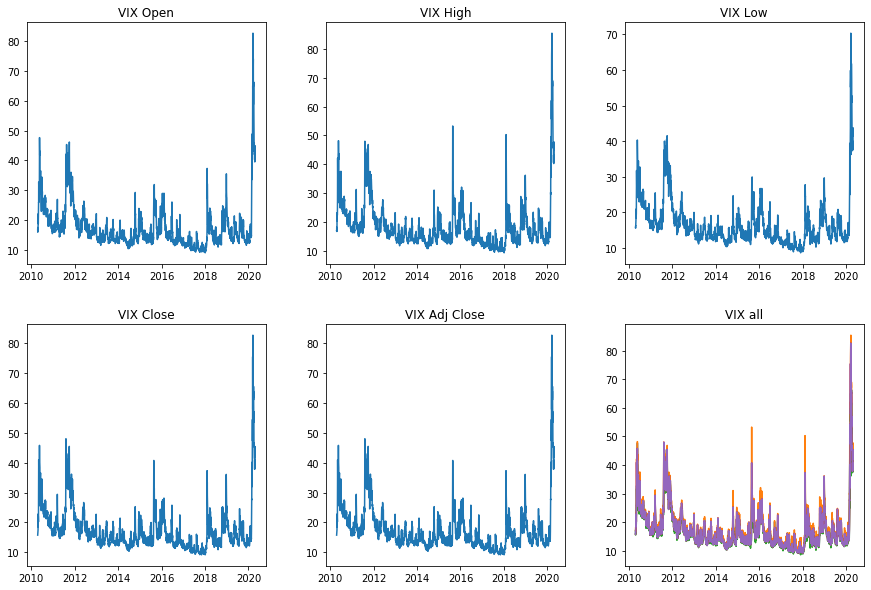

In [28]:
vix_date = pd.to_datetime(np.array(vix["Date"]))
vix_plot = vix[["Open", "High", "Low", "Close","Adj Close"]]
vix_plot.index = vix_date

fig, axs = plt.subplots(2, 3,figsize=(15,10))
fig.subplots_adjust(wspace=0.25)
fig.subplots_adjust(hspace=0.25)

axs[0,0].plot(vix_plot["Open"])
axs[0,0].set_title("VIX Open")
axs[0,1].plot(vix_plot["High"])
axs[0,1].set_title("VIX High")
axs[0,2].plot(vix_plot["Low"])
axs[0,2].set_title("VIX Low")
axs[1,0].plot(vix_plot["Close"])
axs[1,0].set_title("VIX Close")
axs[1,1].plot(vix_plot["Adj Close"])
axs[1,1].set_title("VIX Adj Close")
axs[1,2].plot(vix_plot)
axs[1,2].set_title("VIX all")


# Industrial Production Index (INDPRO)

sources:
https://fred.stlouisfed.org/series/INDPRO

In [29]:
indpro = pd.read_csv("INDPRO.csv",header='infer')
indpro.head()

,DATE,INDPRO
0,2010-03-01,92.5993
1,2010-04-01,92.9436
2,2010-05-01,94.2997
3,2010-06-01,94.4397
4,2010-07-01,94.8536


Text(0.5, 1.0, 'INDPRO 10 Years')

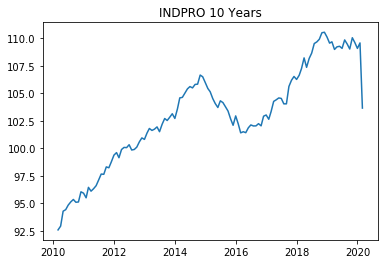

In [30]:
indpro_date = pd.to_datetime(np.array(indpro["DATE"]))
indpro_plot = indpro["INDPRO"]
indpro_plot.index = indpro_date

plt.plot(indpro_plot)
plt.title("INDPRO 10 Years")

# Capacity Utilization Index
sources:
https://fred.stlouisfed.org/series/TCU

In [31]:
cap = pd.read_csv("TCU.csv",header='infer')
cap.head()

,DATE,TCU
0,2010-01-01,70.8069
1,2010-02-01,71.2129
2,2010-03-01,71.8411
3,2010-04-01,72.2743
4,2010-05-01,73.4956


Text(0.5, 1.0, 'Capacity Utilization 10 Years')

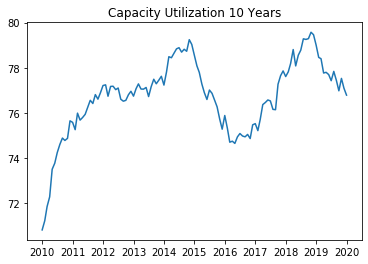

In [32]:
cap_date = pd.to_datetime(np.array(cap["DATE"]))
cap_plot = cap["TCU"]
cap_plot.index = cap_date

plt.plot(cap_plot)
plt.title("Capacity Utilization 10 Years")

# ANALYSIS


In [33]:
# yeilds_concat.shape

In [34]:
# sp.shape

In [35]:
# yeilds_concat.head()

In [36]:
# yeilds_concat.tail()

In [37]:
# sp.head()

In [38]:
# sp.tail()

In [39]:
# sp = sp.reset_index(drop=True)

In [40]:
# print(sp.index)
# for i in range(len(sp["Date"])):
#     try:
#         s = datetime.datetime.strptime(str(sp["Date"].iloc[i]), "%Y-%m-%d  %H:%M:%S")
#         y = datetime.datetime.strptime(str(yeilds_concat["Date"].iloc[i]), "%Y-%m-%d  %H:%M:%S")
#         print(s,y)
#         if s != y:
#             print("HI")
#     #         print(sp["Date"].iloc[i])
#     #         idx = sp.loc[sp["Date"].iloc[i]]
#             print(len(sp))
#             sp.drop(i,inplace=True)
#     #         print(sp.index([i]))
#     #         sp.drop(sp["Date"].iloc[i],inplace=True)
#     except:
#         break
# # for i in sp:
# #     print(i)

In [41]:
# print(sp.shape)
# print(yeilds_concat.shape)

In [42]:
vix["Date"] = pd.to_datetime(np.array(vix["Date"]))
vix = vix.loc[vix["Date"] >= "2015"]

In [43]:
sp = sp.set_index(sp["Date"])

In [44]:
yeilds_concat = yeilds_concat.set_index(yeilds_concat["Date"])

In [45]:
vix = vix.set_index(vix["Date"])

In [46]:
test = sp.merge(yeilds_concat, left_index=True, right_index=True, how='inner')

In [47]:
test1 = test.merge(vix, left_index=True, right_index=True, how='inner')
test1

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,trend,Date_y,1 Mo,...,20 Yr,30 Yr,difference,Date,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,0.033996,2015-01-02,0.02,...,2.41,2.69,1.87,2015-01-02,17.760000,20.139999,17.049999,17.790001,17.790001,0
2015-01-05,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,1.648137,2015-01-05,0.02,...,2.32,2.60,1.78,2015-01-05,19.190001,21.290001,19.190001,19.920000,19.920000,0
2015-01-06,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,0.966300,2015-01-06,0.02,...,2.25,2.52,1.72,2015-01-06,20.330000,22.900000,19.520000,21.120001,21.120001,0
2015-01-07,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,-1.014683,2015-01-07,0.02,...,2.25,2.52,1.71,2015-01-07,20.150000,20.719999,19.040001,19.309999,19.309999,0
2015-01-08,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,-1.552731,2015-01-08,0.01,...,2.33,2.59,1.80,2015-01-08,17.930000,18.090000,16.990000,17.010000,17.010000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,2020-04-16,2799.340088,2806.510010,2764.320068,2799.550049,2799.550049,5179990000,-0.007500,2020-04-16,0.14,...,1.01,1.21,0.44,2020-04-16,41.919998,43.020000,39.869999,40.110001,40.110001,0
2020-04-17,2020-04-17,2842.429932,2879.219971,2830.879883,2874.560059,2874.560059,5792140000,-1.130375,2020-04-17,0.12,...,1.08,1.27,0.49,2020-04-17,39.500000,40.259998,37.630001,38.150002,38.150002,0
2020-04-20,2020-04-20,2845.620117,2868.979980,2820.429932,2823.159912,2823.159912,5220160000,0.789290,2020-04-20,0.10,...,1.04,1.23,0.48,2020-04-20,40.680000,43.830002,39.880001,43.830002,43.830002,0


In [48]:

df = test1.drop(["Date_x","Date_y","Date","2 Mo","Volume_y","Adj Close_x","Adj Close_y","trend","Close_y"],axis=1)
xts = pd.DataFrame(df["Close_x"])
xts = xts.reset_index(drop=True)
xts = xts.drop([1325])
col_Names = list(df.columns)
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = col_Names

In [49]:
df.shape

(1326, 20)

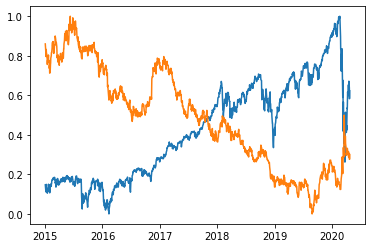

In [50]:

plt.plot(test1["Date_x"],scaled_df["Close_x"])
plt.plot(test1["Date_x"],scaled_df["difference"])


In [51]:
Y = pd.DataFrame(scaled_df["Close_x"])
Xb = pd.DataFrame(scaled_df["Close_x"])
X = pd.DataFrame({"S&P500 Close" : scaled_df["Close_x"], "S&P500 Open" : scaled_df["Open_x"],"S&P500 Low" : scaled_df["Low_x"], "S&P500 High" : scaled_df["High_x"],"1y-10y diff" : scaled_df["difference"]})
#Xc = pd.DataFrame({"S&P500 Close" : scaled_df["Close_x"], "S&P500 Open" : scaled_df["Open_x"],"S&P500 Low" : scaled_df["Low_x"], "S&P500 High" : scaled_df["High_x"]})
X

,S&P500 Close,S&P500 Open,S&P500 Low,S&P500 High,1y-10y diff
0,0.147148,0.145761,0.150402,0.145721,0.860
1,0.122987,0.142878,0.132107,0.134133,0.824
2,0.111447,0.122006,0.116234,0.118492,0.800
3,0.126404,0.111276,0.124591,0.118078,0.796
4,0.149679,0.127475,0.140566,0.140367,0.832
...,...,...,...,...,...
1321,0.623267,0.624375,0.608276,0.620432,0.288
1322,0.671441,0.652228,0.650705,0.667447,0.308
1323,0.638430,0.654291,0.644043,0.660826,0.304
1324,0.582813,0.614983,0.584549,0.606872,0.276


In [52]:
Y=Y.drop([0])

Y=Y.reset_index(drop=True)
Y

,Close_x
0,0.122987
1,0.111447
2,0.126404
3,0.149679
4,0.138549
...,...
1320,0.623267
1321,0.671441
1322,0.638430
1323,0.582813


In [53]:
scaled_df.corr()

,Open_x,High_x,Low_x,Close_x,Volume_x,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,difference,Open_y,High_y,Low_y
Open_x,1.000000,0.999284,0.998873,0.998322,-0.081542,0.844336,0.835451,0.810458,0.769086,0.695989,0.614176,0.437026,0.290446,0.178803,0.038827,-0.159255,-0.863033,-0.045976,-0.034290,-0.049545
High_x,0.999284,1.000000,0.998196,0.998967,-0.065198,0.843864,0.834620,0.809370,0.767645,0.693984,0.611468,0.432657,0.285275,0.172994,0.032240,-0.166829,-0.865783,-0.023244,-0.012918,-0.028884
Low_x,0.998873,0.998196,1.000000,0.999052,-0.108133,0.844414,0.836142,0.811441,0.770612,0.698284,0.617361,0.442421,0.297027,0.186429,0.047673,-0.148867,-0.858948,-0.071907,-0.064804,-0.076790
Close_x,0.998322,0.998967,0.999052,1.000000,-0.087696,0.843978,0.835167,0.810068,0.768699,0.695571,0.613719,0.436632,0.290189,0.178752,0.039062,-0.158626,-0.862569,-0.045157,-0.038832,-0.052001
Volume_x,-0.081542,-0.065198,-0.108133,-0.087696,1.000000,-0.157912,-0.170969,-0.180802,-0.196386,-0.222664,-0.253490,-0.311809,-0.331359,-0.345210,-0.353464,-0.354885,-0.018551,0.699138,0.724423,0.693512
1 Mo,0.844336,0.843864,0.844414,0.843978,-0.157912,1.000000,0.996272,0.987266,0.965135,0.910949,0.846733,0.698065,0.571501,0.480120,0.346391,0.177479,-0.879052,-0.105941,-0.095657,-0.109865
3 Mo,0.835451,0.834620,0.836142,0.835167,-0.170969,0.996272,1.000000,0.995923,0.980155,0.933682,0.874820,0.734156,0.611678,0.521169,0.386835,0.218042,-0.865951,-0.124540,-0.114288,-0.129301
6 Mo,0.810458,0.809370,0.811441,0.810068,-0.180802,0.987266,0.995923,1.000000,0.992662,0.957250,0.905750,0.775875,0.659642,0.571330,0.436894,0.271582,-0.842295,-0.138409,-0.127299,-0.143805
1 Yr,0.769086,0.767645,0.770612,0.768699,-0.196386,0.965135,0.980155,0.992662,1.000000,0.982971,0.944693,0.834289,0.729058,0.645275,0.512315,0.349968,-0.792912,-0.160666,-0.148862,-0.167143
2 Yr,0.695989,0.693984,0.698284,0.695571,-0.222664,0.910949,0.933682,0.957250,0.982971,1.000000,0.987613,0.915188,0.832022,0.758915,0.635125,0.478677,-0.680004,-0.195170,-0.182058,-0.202268


In [54]:
X=X.drop([1325])
Xb = Xb.drop([1325])
#Xc = Xc.drop([1325])

In [55]:
from sklearn.model_selection import train_test_split
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dropout
;

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

''

In [56]:
splt = int(len(X)*.75)
X_test = X.iloc[splt:]
Y_test = Y.iloc[splt:]
xts = xts.iloc[splt:]
Xbts = Xb.iloc[splt:]
#Xcts = Xc.iloc[splt:]
Y_test = Y_test.reset_index(drop=True)
print(X_test.shape)
print(Y_test.shape)
l=[]
for i in range(splt,len(X)):
    l.append(i)
Y_train=Y.drop(l)
Xbtr = Xb.drop(l)
#Xctr = Xc.drop(l)
X_train=X.drop(l)

Yts = Y_test
Ytr= Y_train


print(X_train.shape)
print(Y_train.shape)


(332, 5)
(332, 1)
(993, 5)
(993, 1)


In [57]:
'''
Xc_train = np.asarray(Xctr)
Xc_test = np.asarray(Xcts)
Xc_train = np.reshape(Xc_train, (Xc_train.shape[0], Xc_train.shape[1],1))
Xc_test = np.reshape(Xc_test, (Xc_test.shape[0], Xc_test.shape[1],1))

modelc = Sequential()
modelc.add(LSTM(10, input_shape=(4,1)))
modelc.add(Dense(1))
modelc.compile(loss='mean_squared_error', optimizer='adam')
modelc.fit(Xc_train, Y_train, epochs=100, batch_size=1, verbose=1)
'''

"\nXc_train = np.asarray(Xctr)\nXc_test = np.asarray(Xcts)\nXc_train = np.reshape(Xc_train, (Xc_train.shape[0], Xc_train.shape[1],1))\nXc_test = np.reshape(Xc_test, (Xc_test.shape[0], Xc_test.shape[1],1))\n\nmodelc = Sequential()\nmodelc.add(LSTM(10, input_shape=(4,1)))\nmodelc.add(Dense(1))\nmodelc.compile(loss='mean_squared_error', optimizer='adam')\nmodelc.fit(Xc_train, Y_train, epochs=100, batch_size=1, verbose=1)\n"

In [58]:
Xb_train = np.asarray(Xbtr)
Xb_test = np.asarray(Xbts)
Xb_train = np.reshape(Xb_train, (Xb_train.shape[0], Xb_train.shape[1],1))
Xb_test = np.reshape(Xb_test, (Xb_test.shape[0], Xb_test.shape[1],1))

In [59]:
modelb = Sequential()
modelb.add(LSTM(10, input_shape=(1,1)))
modelb.add(Dense(1))
modelb.compile(loss='mean_squared_error', optimizer='adam')
modelb.fit(Xb_train, Y_train, epochs=100, batch_size=1, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
993/993 [==============================] - 2s 2ms/step - loss: 0.0255
Epoch 2/100
993/993 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 3/100
993/993 [==============================] - 2s 2ms/step - loss: 1.9976e-04
Epoch 4/100
993/993 [==============================] - 2s 2ms/step - loss: 2.0280e-04
Epoch 5/100
993/993 [==============================] - 2s 2ms/step - loss: 1.9538e-04
Epoch 6/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8914e-04
Epoch 7/100
993/993 [==============================] - 2s 2ms/step - loss: 1.9277e-04
Epoch 8/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8705e-04A: 1s - loss: 1.85
Epoch 9/100
993/993 [==============================] - 3s 3ms/step - loss: 1.9011e-04
Epoch 10/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8630e-04
Epoch 11/

993/993 [==============================] - 2s 2ms/step - loss: 1.8316e-04A: 0s - loss: 1.7
Epoch 87/100
993/993 [==============================] - 2s 2ms/step - loss: 1.7878e-04
Epoch 88/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8036e-04
Epoch 89/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8068e-04
Epoch 90/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8013e-04
Epoch 91/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8130e-04
Epoch 92/100
993/993 [==============================] - 2s 2ms/step - loss: 1.7885e-04
Epoch 93/100
993/993 [==============================] - 2s 2ms/step - loss: 1.7864e-04
Epoch 94/100
993/993 [==============================] - 2s 2ms/step - loss: 1.7896e-04
Epoch 95/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8205e-04
Epoch 96/100
993/993 [==============================] - 2s 2ms/step - loss: 1.8103e-04
Epoch 97/100
993/993 [=================

In [60]:

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [61]:
def testAccuracy(test,predTest):
    print("RMSE = %.4f" % np.sqrt(mean_squared_error(test,predTest)))
    print("MAE = %.4f" % mean_absolute_error(test,predTest))
    

In [62]:
model = Sequential()
model.add(LSTM(10, input_shape=(X.shape[1],1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
993/993 [==============================] - 4s 4ms/step - loss: 0.0147
Epoch 2/100
993/993 [==============================] - 4s 4ms/step - loss: 2.7967e-04
Epoch 3/100
993/993 [==============================] - 4s 4ms/step - loss: 2.4873e-04
Epoch 4/100
993/993 [==============================] - 4s 4ms/step - loss: 2.5545e-04
Epoch 5/100
993/993 [==============================] - 4s 4ms/step - loss: 2.4224e-04
Epoch 6/100
993/993 [==============================] - 4s 4ms/step - loss: 2.6692e-04
Epoch 7/100
993/993 [==============================] - 4s 4ms/step - loss: 2.5736e-04
Epoch 8/100
993/993 [==============================] - 4s 4ms/step - loss: 2.5982e-04
Epoch 9/100
993/993 [==============================] - 4s 4ms/step - loss: 2.6868e-04
Epoch 10/100
993/993 [==============================] - 4s 4ms/step - loss: 2.7807e-04
Epoch 11/100
993/993 [==============================] - 4s 4ms/step - loss: 2.4940e-04
Epoch 12/100
993/993 [==============================] - 

993/993 [==============================] - 4s 4ms/step - loss: 2.3530e-04
Epoch 96/100
993/993 [==============================] - 4s 4ms/step - loss: 2.4434e-04
Epoch 97/100
993/993 [==============================] - 4s 4ms/step - loss: 2.3769e-04
Epoch 98/100
993/993 [==============================] - 4s 4ms/step - loss: 2.3598e-04
Epoch 99/100
993/993 [==============================] - 4s 4ms/step - loss: 2.3189e-04
Epoch 100/100
993/993 [==============================] - 4s 4ms/step - loss: 2.3717e-04


In [63]:
btrainPredict = modelb.predict(Xb_train)
btestPredict = modelb.predict(Xb_test)


print(testAccuracy(Y_train,btrainPredict))




RMSE = 0.0134
MAE = 0.0096
None


In [64]:

#ctrainPredict = modelc.predict(Xc_train)
#ctestPredict = modelc.predict(Xc_test)


#print(testAccuracy(Y_train,ctrainPredict))

In [65]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


print(testAccuracy(Y_train,trainPredict))


RMSE = 0.0153
MAE = 0.0107
None


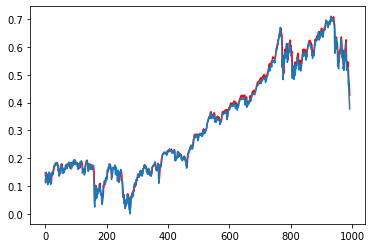

In [66]:
plt.plot(trainPredict,color='r')
plt.plot(Y_train)

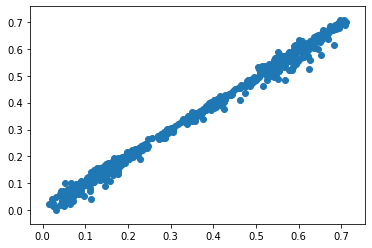

In [67]:
plt.scatter(trainPredict,Y_train)

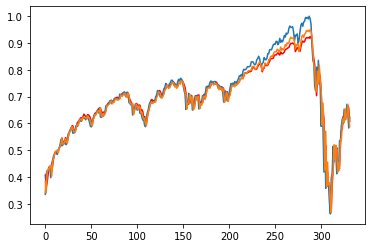

In [68]:
plt.plot(testPredict,color='r')
plt.plot(Y_test)
plt.plot(btestPredict)
#plt.plot(ctestPredict)

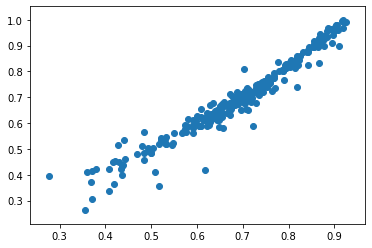

In [69]:
plt.scatter(testPredict,Y_test)

In [70]:

Y_train = np.asarray(Y_train["Close_x"])
Y_test = np.asarray(Y_test["Close_x"])



btestPredict_dataset_like = np.zeros(shape=(len(btestPredict), scaled_df.shape[1]) )
btestPredict_dataset_like[:,3] = btestPredict[:,0]
btestPredict = scaler.inverse_transform(btestPredict_dataset_like)[:,3]
'''
ctestPredict_dataset_like = np.zeros(shape=(len(ctestPredict), scaled_df.shape[1]) )
ctestPredict_dataset_like[:,3] = ctestPredict[:,0]
ctestPredict = scaler.inverse_transform(ctestPredict_dataset_like)[:,3]
'''
trainPredict_dataset_like = np.zeros(shape=(len(trainPredict), scaled_df.shape[1]) )
trainPredict_dataset_like[:,3] = trainPredict[:,0]
trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,3]


YPredict_dataset_like = np.zeros(shape=(len(Y_train), scaled_df.shape[1]))
YPredict_dataset_like[:,3]= Y_train[:]
Y_train = scaler.inverse_transform(YPredict_dataset_like)[:,3]


testPredict_dataset_like = np.zeros(shape=(len(testPredict), scaled_df.shape[1]) )
testPredict_dataset_like[:,3] = testPredict[:,0]
testPredict = scaler.inverse_transform(testPredict_dataset_like)[:,3]


YtPredict_dataset_like = np.zeros(shape=(len(Y_test), scaled_df.shape[1]) )
YtPredict_dataset_like[:,3]= Y_test[:]
Y_test = scaler.inverse_transform(YtPredict_dataset_like)[:,3]


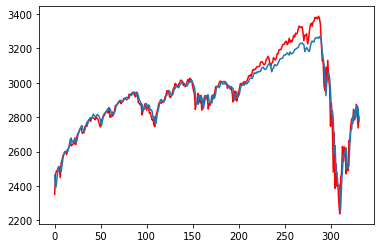

In [71]:

plt.plot(Y_test, color = 'r')
plt.plot(testPredict)

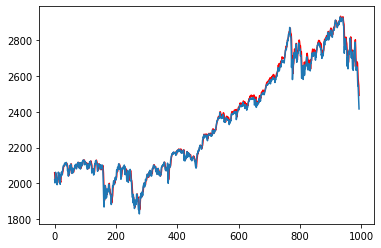

In [72]:
plt.plot(trainPredict, color = 'r')
plt.plot(Y_train)

In [73]:
print(testAccuracy(Y_train,trainPredict))

RMSE = 23.7602
MAE = 16.6344
None


In [74]:
print(testAccuracy(Y_test,btestPredict))
#print(testAccuracy(Y_test,ctestPredict))
print(testAccuracy(Y_test,testPredict))

RMSE = 53.6878
MAE = 35.0666
None
RMSE = 55.8859
MAE = 37.7574
None


In [75]:
print(100-((abs(testPredict[-1] - Y_test[-1]))/Y_test[-1])*100)

99.16139743935388


In [76]:
def testAccuracy1(test,predTest):
    rmse =  np.sqrt(mean_squared_error(test,predTest))
    mse =  mean_absolute_error(test,predTest)
    return rmse,mse

In [77]:
xts

,Close_x
993,2416.620117
994,2351.100098
995,2467.699951
996,2488.830078
997,2485.739990
...,...
1320,2783.360107
1321,2799.550049
1322,2874.560059
1323,2823.159912


In [78]:
def buyOrSell(testPredict,X_test,position,value):
    if not position:
        if testPredict >= X_test:
            
            value = value/X_test
            position = 1
            return value,position,value*X_test
        if testPredict < X_test:
            
            return value,position,value
    if position:
        if testPredict < X_test:
            
            value = value*X_test
            position = 0
            return value,position,value
        if testPredict >= X_test:
            
            return value,position,value*X_test

In [177]:
def shortOrLong(testPredict,X_test,position,value,short):
    if not position:
        if testPredict >= X_test:
            return value,position,value,short
        if testPredict < X_test:
            nums = value//X_test
            value += nums*X_test
            short = nums
            position = 1
            return value,position,value-short*X_test,short
    if position:
        if testPredict < X_test:
            
            value-=((.07*X_test*short)/360)
            return value,position,value-short*X_test,short
        if testPredict >= X_test:
            value-=short*X_test
            position = 0
            return value,position,value,short

In [203]:
value = 50
valuem = 50
valueb = 50
short = 0
shortl = 0
positions=0
positionsl=1
position = 1
positionm = 1
positionb = 1
l = []
rvlc=[]
rvlb=[]
rvlm=[]
rvls=[]
rvlsl=[]
vol = list(test1["Close_y"].iloc[splt:])
atpl = list(testPredict)
ylist = list(Y_test)
btpl= list(btestPredict)
xtl = list(xts["Close_x"])
starting=50*ylist[0]
values=50*ylist[0]
valuesl=50*ylist[0]

for i in range(len(testPredict)):
    if vol[i] > 25:
        tpl = atpl[i]
    else:
        tpl=btpl[i]
    value,position,realval = buyOrSell(tpl,xtl[i],position,value)
    valuem,positionm,realvalm = buyOrSell(atpl[i],xtl[i],positionm,valuem)
    valueb,positionb,realvalb = buyOrSell(btpl[i],xtl[i],positionb,valueb)
    values,positions,realvals,short = shortOrLong(atpl[i],xtl[i],positions,values,short)
    valuesl,positionsl,realvalsl,shortl = shortOrLong(atpl[i],xtl[i],positionsl,valuesl,shortl)
    rvls.append(realvals)
    rvlsl.append(realvalsl+realvalm)
    rvlm.append(realvalm)
    rvlb.append(realvalb)
    rvlc.append(realval)


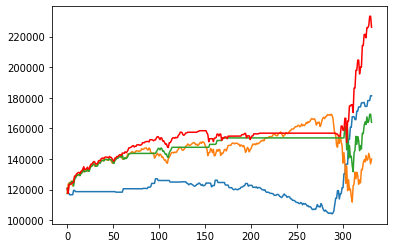

In [201]:

yrl=[]

for i in Y_test: 
    yrl.append(i*50)
plt.plot(rvls)
plt.plot(yrl)
plt.plot(rvlb)
plt.plot(rvlm, color = "r")


In [200]:
print("S&P 500 index account growth from long term holding: %.4f " % (((yrl[-1] - starting)/starting)*100),"%")
print("Baseline account growth: %.4f " % (((rvlb[-1] - starting)/starting)*100),"%")
print("Final Model account growth taking short postions: %.4f " % (((rvls[-1] - starting)/starting)*100),"%")
print("Final Model account growth taking long positions: %.4f " % (((rvlm[-1] - starting)/starting)*100),"%")
print("Final Model account growth taking long and short postions: %.4f " % (((rvlsl[-1] - starting)/starting)*100),"%")

S&P 500 index account growth from long term holding: 19.0638  %
Baseline account growth: 39.5470  %
Final Model account growth taking short postions: 54.2700  %
Final Model account growth taking long positions: 92.3518  %
Final Model account growth taking long and short postions: 246.6218  %


259622.7545082401   214355.37942167986


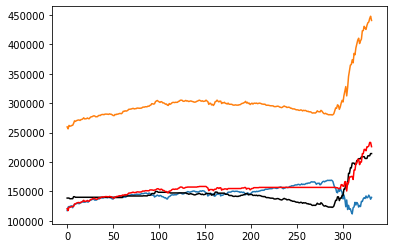

In [193]:
print(rvlsl[0]," ",rvls[-1])

plt.plot(yrl)
plt.plot(rvls,color = "black")
plt.plot(rvlm,color = "red")
plt.plot(rvlsl)

In [ ]:
def findBest(k):
    print("COUNTING: ",k)
    splt = int(len(X)*.75)
    X_test = X.iloc[splt:]
    Y_test = Y.iloc[splt:]
    Y_test = Y_test.reset_index(drop=True)
    print(X_test.shape)
    print(Y_test.shape)
    l=[]
    for i in range(splt,len(X)):
        l.append(i)
    Y_train=Y.drop(l)

    X_train=X.drop(l)

    Yts = Y_test
    Ytr= Y_train


    print(X_train.shape)
    print(Y_train.shape)
    
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
    
    model = Sequential()
    model.add(LSTM(5, input_shape=(X.shape[1],1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=k, batch_size=1, verbose=0)
    
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)
    
    Y_train = np.asarray(Y_train["Close_x"])
    Y_test = np.asarray(Y_test["Close_x"])





    trainPredict_dataset_like = np.zeros(shape=(len(trainPredict), scaled_df.shape[1]) )
    trainPredict_dataset_like[:,3] = trainPredict[:,0]
    trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,3]


    YPredict_dataset_like = np.zeros(shape=(len(Y_train), scaled_df.shape[1]))
    YPredict_dataset_like[:,3]= Y_train[:]
    Y_train = scaler.inverse_transform(YPredict_dataset_like)[:,3]

    trrmse,trmse = testAccuracy1(Y_train,trainPredict)
    testPredict_dataset_like = np.zeros(shape=(len(testPredict), scaled_df.shape[1]) )
    testPredict_dataset_like[:,3] = testPredict[:,0]
    testPredict = scaler.inverse_transform(testPredict_dataset_like)[:,3]


    YtPredict_dataset_like = np.zeros(shape=(len(Y_test), scaled_df.shape[1]) )
    YtPredict_dataset_like[:,3]= Y_test[:]
    Y_test = scaler.inverse_transform(YtPredict_dataset_like)[:,3]
    ttrmse,ttmse = testAccuracy1(Y_test,testPredict)
    return ttrmse,ttmse,trrmse,trmse
    
    
    

In [ ]:
# test_rmse=[]
# test_mse=[]
# train_rmse=[]
# train_mse=[]
# il=[]

# for i in range(50,150,10):
#     vals = findBest(i)
#     test_rmse.append(vals[0])
#     test_mse.append(vals[1])
#     train_rmse.append(vals[2])
#     train_mse.append(vals[3])
#     il.append(i)



In [ ]:
# plt.scatter(il,test_rmse)